In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [4]:
marks_final = pd.read_csv('marks_final.csv')

In [5]:
marks_final.isna().sum().sum()

0

In [6]:
marks_final['Q1 (5)'].unique()

array(['AB', '5', '3', '4', '2', '0', 'O AB', '1'], dtype=object)

In [7]:
marks_final['Q1 (5)'].apply(type).value_counts()

Q1 (5)
<class 'str'>    1053
Name: count, dtype: int64

In [8]:
marks_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SNO.               1053 non-null   int64  
 1   ROLL NUMBER        1053 non-null   int64  
 2   Q1 (5)             1053 non-null   object 
 3   Q2 (5)             1053 non-null   object 
 4   Q3 (5)             1053 non-null   object 
 5   Q4 (5)             1053 non-null   object 
 6   Q5 (5)             1053 non-null   object 
 7   Q6 (5)             1053 non-null   object 
 8   Q7 (5)             1053 non-null   object 
 9   Q8 (5)             1053 non-null   object 
 10  Q9 (5)             1053 non-null   object 
 11  Q10 (5)            1053 non-null   object 
 12  Q11 (5)            1053 non-null   object 
 13  Q12 (5)            1053 non-null   object 
 14  Top 9 (out of 45)  1053 non-null   int64  
 15  Out of 30          1053 non-null   float64
dtypes: float64(1), int64(3),

In [9]:
marks_final.describe()

,SNO.,ROLL NUMBER,Top 9 (out of 45),Out of 30
count,1053.00000,1.053000e+03,1053.000000,1053.000000
mean,527.00000,1.027862e+08,38.144349,25.430104
std,304.11922,1.848957e+07,7.150877,4.766492
min,1.00000,1.020037e+08,0.000000,0.000000
25%,264.00000,1.022033e+08,37.000000,24.700000
50%,527.00000,1.022035e+08,40.000000,26.700000
75%,790.00000,1.022038e+08,42.000000,28.000000
max,1053.00000,7.022000e+08,45.000000,30.000000


array([[<Axes: title={'center': 'Top 9 (out of 45)'}>,
        <Axes: title={'center': 'Out of 30'}>]], dtype=object)

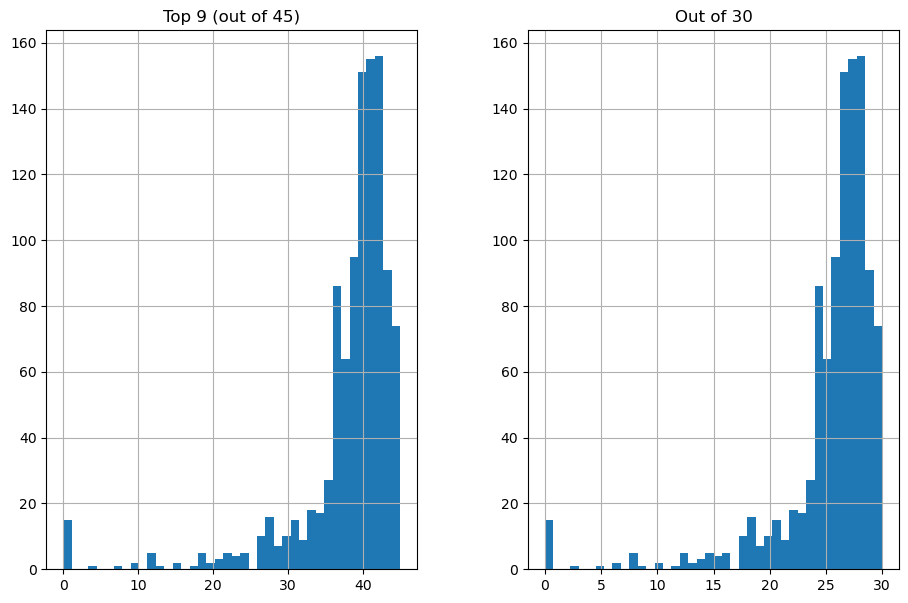

In [10]:
marks_final[['Top 9 (out of 45)' , 'Out of 30']].hist(bins = 40 , figsize = (11 , 7))

In [11]:
if 'ROLL NUMBER , SNO.' in marks_final.columns:
   marks_final.drop(columns = ['ROLL NUMBER' , 'SNO.'] , inplace = True)
target = 'Top 9 (out of 45)'
y = marks_final[target]
X = marks_final.drop(columns = [target])

In [12]:
X = X.drop(['SNO.', 'ROLL NUMBER'] , axis = 1)

In [13]:
value_counts = y.value_counts()
to_keep = value_counts[value_counts > 4].index

X = X[y.isin(to_keep)]
y = y[y.isin(to_keep)]

In [14]:
numerical_cols = X.select_dtypes(include = ['int64' , 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include = ['object']).columns.tolist()

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
numerical_transformer = Pipeline(steps =[
                                         ('imputer' , SimpleImputer(strategy = 'median')) , 
                                         ('scaler' , StandardScaler())
])



categorical_transformer = Pipeline(
                                   steps = [('imputer' , SimpleImputer(strategy = 'constant' , fill_value = 'missing')) ,
                                            ('ohe' , OneHotEncoder(handle_unknown = 'ignore'))
                                           ])
 

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num' , numerical_transformer , numerical_cols) ,
        ('cat' , categorical_transformer , categorical_cols)
    
         ])

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = Pipeline(steps = [
    ('preprocessing' , preprocessor) ,
    ('calssifier' , RandomForestClassifier(n_estimators = 100 , random_state = 42))
])

In [21]:
X_train , X_test , y_train , y_test = tts(X , y , test_size = 0.2  , random_state = 42)

In [22]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [23]:
clf.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Out of 30']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Q1 (5)', 'Q2 (5)', 'Q3 (5)',
                                                   'Q4 (5)', 'Q5 (5)', 'Q6 (5)',
                                                   'Q7 (5)', 'Q8 (5)', 'Q9 (5)',
                                                   'Q10 (5)', 'Q11 (5)',
                                                   'Q12 (5)'])])),
                ('calssifier', RandomForestClassifier(random_state=42))])

In [24]:
y_pred = clf.predict(X_test)

In [25]:
classification_report(y_test , y_pred)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.71      1.00      0.83         5\n          12       0.00      0.00      0.00         2\n          22       0.00      0.00      0.00         1\n          24       0.00      0.00      0.00         2\n          26       0.00      0.00      0.00         1\n          27       1.00      1.00      1.00         1\n          28       1.00      0.33      0.50         3\n          29       0.00      0.00      0.00         1\n          30       0.00      0.00      0.00         2\n          31       0.00      0.00      0.00         3\n          32       0.00      0.00      0.00         2\n          33       0.00      0.00      0.00         2\n          34       0.00      0.00      0.00         2\n          35       0.00      0.00      0.00         3\n          36       0.00      0.00      0.00         1\n          37       0.60      0.27      0.38        11\n          38       0.44      0.89      0.59         9\n       

In [26]:
confusion_matrix(y_test , y_pred)

array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0, 

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cv = cross_val_score(clf , X , y , cv = 5)

In [58]:
round(cv.mean() , 3)

0.703